# WINE QUALITY RED PROJECT

**Predict the Quality of Red Wine on a Scale of 0 - 10**

**Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Import Data Set**

In [2]:
Wine = pd.read_csv("Wine Quality Red.csv")

**Top 5 Rows of the Data Set (Quality is a Target Variable)**

In [3]:
Wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


**Information of Data Set**

In [4]:
print(Wine.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


**Every Feature is Numeric, no Categorical Variable is Present.**

**Correlation of Each Variable with our Target Variable.**

In [5]:
print(round(Wine.corr()[['quality']].drop('quality'),2))

                      quality
fixed acidity            0.12
volatile acidity        -0.39
citric acid              0.23
residual sugar           0.01
chlorides               -0.13
free sulfur dioxide     -0.05
total sulfur dioxide    -0.19
density                 -0.17
pH                      -0.06
sulphates                0.25
alcohol                  0.48


**Heat Map for Correlation**

**Set Figure Size and Axes**

**Set Limits to Bottom and Top Part of Axes so that Annotations will not Break**

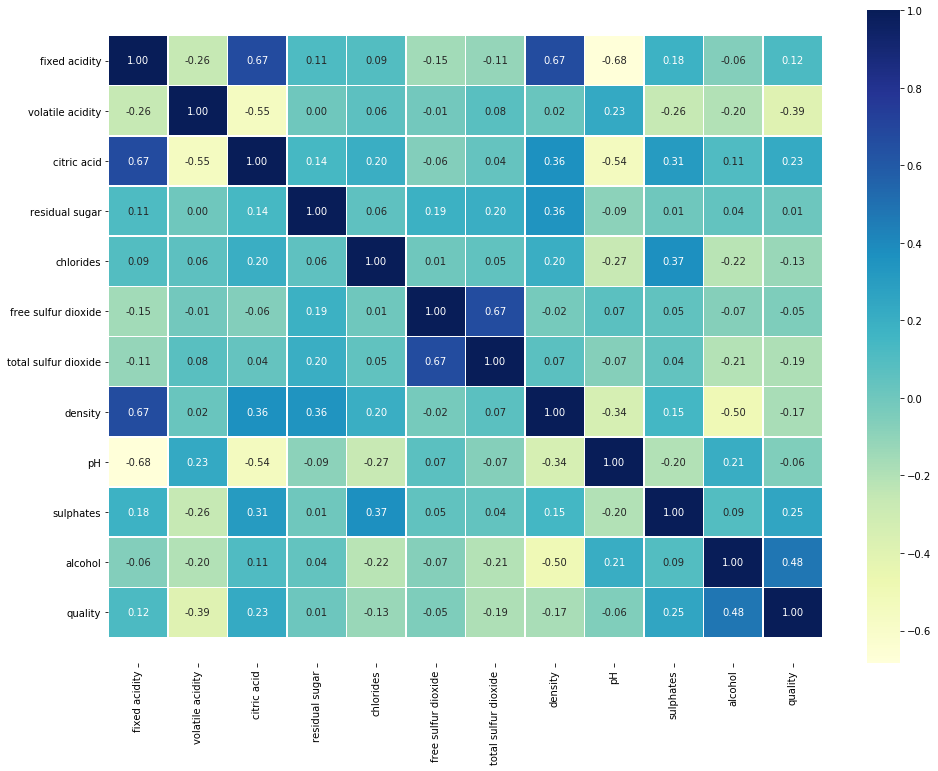

In [6]:
Fig, Axes = plt.subplots(figsize = (16, 12)) 
Axes = sns.heatmap(Wine.corr(), annot = True, linewidths = 0.5, fmt = '.2f', cmap = 'YlGnBu')

# Adjusting the Broken Map :
Bottom, Top = Axes.get_ylim() 
Axes.set_ylim(Bottom + 0.5, Top - 0.5);

**Define a Function to get the Features that have Good Correlation with the Target Feature.**

In [7]:
def Feature(Threshold) :
    Absolute_Correlation = (Wine.corr()["quality"].drop("quality")).abs()
    High_Correlation = Absolute_Correlation[Absolute_Correlation > Threshold].index.values.tolist()
    return High_Correlation

**Create a Set of Independent Features containing Correlation more than 0.05 as X and Dependent Target Feature Y**

In [8]:
Features = Feature(0.05)
print(Features)

['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [9]:
X = Wine[Features]
Y = Wine['quality']

**Splitting the Data into Train Set and Test Set**

In [10]:
from sklearn.model_selection import train_test_split

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.25, random_state = 7)

In [11]:
print(f"Train Data Set : 75% of Independent Features : {len(X_Train)} and Target Feature : {len(Y_Train)}")
print()
print(f"Test Data Set : 25% of Independent Features : {len(X_Test)} and Target Feature : {len(Y_Test)}")

Train Data Set : 75% of Independent Features : 1199 and Target Feature : 1199

Test Data Set : 25% of Independent Features : 400 and Target Feature : 400


**Create a Linear Regression Model**

In [12]:
from sklearn.linear_model import LinearRegression

Model = LinearRegression()

**Fit Linear Regression Model on Training Data Set**

In [13]:
Model.fit(X_Train, Y_Train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Coefficients of Features**

In [14]:
print(Model.coef_)

[ 1.69756729e-02 -1.13064821e+00 -3.04842730e-01 -1.55351032e+00
  4.35145681e-03 -3.25353890e-03 -7.81476500e+00 -6.93556179e-01
  7.99130406e-01  3.09964208e-01]


**Predictions**

In [15]:
Train_Predictions = Model.predict(X_Train)
Test_Predictions = Model.predict(X_Test)

**Calculate Root Mean Squared Error to Find Difference between the Actual and Predictions made by the Model.**

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [17]:
print(f"Mean Absolute Error of Predictions : {mean_absolute_error(Y_Test, Test_Predictions)*100:.2f}")
print()
print(f"Mean Squared Error of Predictions : {mean_squared_error(Y_Test, Test_Predictions)*100:.2f}")
print()
print(f"Root Mean Squared Error of Predictions : {np.sqrt(mean_squared_error(Y_Test, Test_Predictions))*100:.2f}")

Mean Absolute Error of Predictions : 50.58

Mean Squared Error of Predictions : 41.84

Root Mean Squared Error of Predictions : 64.69


**Coefficient of Each Feature**

In [18]:
Coefficient = pd.DataFrame(Model.coef_,Features, columns = ["Slopes"])
print(Coefficient)

                        Slopes
fixed acidity         0.016976
volatile acidity     -1.130648
citric acid          -0.304843
chlorides            -1.553510
free sulfur dioxide   0.004351
total sulfur dioxide -0.003254
density              -7.814765
pH                   -0.693556
sulphates             0.799130
alcohol               0.309964


**Holding all Features Fixed**

**A Unit Increase in Sulphates will lead to Increase of 0.8 in Quality of Wine, Similarly for all Features.**

**A Unit Increase in Volatile Acidity will lead to Decrease of 1.13 in Quality of Wine.**